In [ ]:
import pandas as pd

# Read the JSON file in chunks of 5000 records
chunk_size = 5000
json_file_path = "/kaggle/input/electronics-5/Electronics_5.json"

chunks = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

# Initialize an empty list to hold DataFrames
review_dfs = []

# Convert each chunk to a DataFrame and append it to the list
for chunk in chunks:
    review_dfs.append(chunk)

# Concatenate all DataFrames into one
review_df = pd.concat(review_dfs, ignore_index=True)

review_df.head()


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,67.0,True,"09 18, 1999",AAP7PPBU72QFM,0151004714,{'Format:': ' Hardcover'},D. C. Carrad,This is the best novel I have read in 2 or 3 y...,A star is born,937612800,NaN
1,3,5.0,True,"10 23, 2013",A2E168DTVGE6SV,0151004714,{'Format:': ' Kindle Edition'},Evy,"Pages and pages of introspection, in the style...",A stream of consciousness novel,1382486400,NaN
2,5,4.0,False,"09 2, 2008",A1ER5AYS3FQ9O3,0151004714,{'Format:': ' Paperback'},Kcorn,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...,1220313600,NaN
3,5,13.0,False,"09 4, 2000",A1T17LMQABMBN5,0151004714,{'Format:': ' Hardcover'},Caf Girl Writes,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!,968025600,NaN
4,3,8.0,True,"02 4, 2000",A3QHJ0FXK33OBE,0151004714,{'Format:': ' Hardcover'},W. Shane Schmidt,I was taken in by reviews that compared this b...,A dissenting view--In part.,949622400,NaN


In [ ]:
review_df.shape

(6739590, 12)

In [ ]:
import pandas as pd

# Define the chunk size for reading the JSON file
chunk_size = 5000

# Path to the JSON file
json_file_path = "/kaggle/input/meta-electronics/meta_Electronics.json"

# Initialize an empty list to hold DataFrames
meta_dfs = []

# Iterate over chunks and filter rows containing 'headphone'
for chunk in pd.read_json(json_file_path, lines=True, chunksize=chunk_size):
    # Filter the chunk for rows containing 'headphone' in the title column, ignoring case and handling missing values
    filtered_chunk = chunk[chunk['title'].str.contains('headphone', case=False, na=False)]
    # Append the filtered chunk to the list
    meta_dfs.append(filtered_chunk)

# Concatenate all DataFrames into one
meta_df = pd.concat(meta_dfs, ignore_index=True)

# Display the first few rows of the resulting DataFrame
meta_df.head()


,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Wireless Bluetooth Headphones Earbuds with Mic...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[>#950 in Cell Phones & Accessories (See Top 1...,[],Home Audio & Theater,,"October 23, 2017",$7.99,0132492776,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Headphones]",,[Use these high quality headphones for interne...,,Polaroid Pbm2200 PC / Gaming Stereo Headphones...,[],,Polaroid,"[Ideal for PC Internet chatting, PC / Console ...","[>#3,548,269 in Cell Phones &amp; Accessories ...",[],All Electronics,,"December 13, 2012",,0558835155,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#4,626,934 in Cell Phones & Accessories (See...",[],Home Audio & Theater,,"December 28, 2015",,0692206280,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#2,654,020 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"October 18, 2015",,0983629269,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br />Wit...",,Bluetooth Workout Headphones for Running and G...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,"[>#5,289,289 in Cell Phones &amp; Accessories ...",[],Home Audio &amp; Theater,,"April 26, 2013",,0985262788,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [ ]:
# Drop rows with missing values inplace and assign the result back to meta_df
# meta_df.dropna(inplace=True)  # Dropping rows with missing values

# Drop duplicates based on the 'asin' column and keep only the first occurrence of each ASIN
meta_df = meta_df.drop_duplicates(subset=["asin"])

# Display the shape (number of rows and columns) of the DataFrame
meta_df.shape


(26865, 19)

In [ ]:
meta_df.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [ ]:
review_df.columns

Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'image'],
      dtype='object')

In [ ]:
asin_list=meta_df["asin"]
review_df=review_df[review_df["asin"].isin(asin_list)]
review_df


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
2441,5,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,Great headphones. It's just the cord is too sh...,Five Stars,1424563200,NaN
2442,5,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,Really like these headphone. Wanted something...,Officewear,1494201600,NaN
2443,1,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,Wire to headphone broke off in less than a mon...,For the money they are fine. Just hope they ho...,1478304000,NaN
2444,3,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,Very good,Three Stars,1474675200,NaN
2445,1,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,Currently returning this product because the s...,Currently returning this product because the s...,1468713600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6739452,5,NaN,True,"05 4, 2018",A3E7OV7IR941JI,B01HI7D4VY,NaN,JC,I used these for tail light replacement bulbs ...,Excellent LEDS,1525392000,NaN
6739453,3,NaN,True,"03 14, 2018",A26I2RPRWOGD2V,B01HI7D4VY,NaN,Ray,Not the brightest bulb on the block.,Not the brightest bulb on the block.,1520985600,NaN
6739559,4,NaN,True,"09 22, 2018",A3VA3VK4PO1JD,B01HJ8E11E,{'Color:': ' White'},CD,I have only used these for 1 week at the time ...,They work...,1537574400,NaN
6739560,3,NaN,True,"09 12, 2018",A11TVS6FKXS80H,B01HJ8E11E,{'Color:': ' White'},Jay Salamon,"The product works great, but when it gets down...",30% charge shuts the device off,1536710400,NaN


In [ ]:
review_df.shape

(411201, 12)

In [ ]:
import pandas as pd

# Assuming review_df already contains the DataFrame with reviews

# Create one-hot encoding for each rating value
rating_columns = pd.get_dummies(review_df['overall'], prefix='Rating')

# Concatenate one-hot encoding with review_df
review_df_with_ratings = pd.concat([review_df, rating_columns], axis=1)

# Group by 'asin' and aggregate ratings
product_grouped = review_df_with_ratings.groupby('asin').agg({
    'Rating_1': 'sum',  # Total count of 1-star ratings
    'Rating_2': 'sum',  # Total count of 2-star ratings
    'Rating_3': 'sum',  # Total count of 3-star ratings
    'Rating_4': 'sum',  # Total count of 4-star ratings
    'Rating_5': 'sum',  # Total count of 5-star ratings
    'overall': 'count'  # Total count of reviews
})

# Rename the column for overall count to 'Number of Reviews per Product'
product_grouped.rename(columns={'overall': 'Number of Reviews per Product'}, inplace=True)

# Calculate Average Rating Score per Product
product_grouped['Average Rating Score per Product'] = (product_grouped['Rating_1'] +
                                                      2 * product_grouped['Rating_2'] +
                                                      3 * product_grouped['Rating_3'] +
                                                      4 * product_grouped['Rating_4'] +
                                                      5 * product_grouped['Rating_5']) / product_grouped['Number of Reviews per Product']

# Calculate Number of Good Ratings per Product (ratings >= 4 are considered good)
product_grouped['Number of Good Ratings per Product'] = product_grouped['Rating_4'] + product_grouped['Rating_5']

# Calculate Number of Bad Ratings per Product (ratings < 4 are considered bad)
product_grouped['Number of Bad Ratings per Product'] = product_grouped['Rating_1'] + product_grouped['Rating_2'] + product_grouped['Rating_3']

# Displaying the DataFrame
product_grouped


,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,Number of Reviews per Product,Average Rating Score per Product,Number of Good Ratings per Product,Number of Bad Ratings per Product
asin,,,,,,,,,
4126895493,18,3,8,4,16,49,2.938776,20,29
B000001OMI,4,2,5,10,20,41,3.975610,30,11
B000001OMR,4,3,1,1,2,11,2.454545,3,8
B00000DMA3,0,0,3,5,3,11,4.000000,8,3
B00000J1EJ,10,12,9,11,8,50,2.900000,19,31
...,...,...,...,...,...,...,...,...,...
B01HI5SGRS,2,0,0,0,4,6,3.666667,4,2
B01HI5YYN8,1,1,0,10,18,30,4.433333,28,2
B01HI7D4VY,0,1,3,5,35,44,4.681818,40,4


In [ ]:
!pip install spacy

!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
import re
import unicodedata

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Function to remove HTML tags
def remove_html_tags(text):
    if isinstance(text, str):
        clean = re.compile('<.*?>')
        return re.sub(clean, '', text)
    else:
        return text

# Function to remove accented characters
def remove_accented_chars(text):
    if isinstance(text, str):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text
    else:
        return text

# Function to remove special characters
def remove_special_characters(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    else:
        return text

# Function for lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        doc = nlp(text)
        lemmatized_tokens = [token.lemma_ for token in doc]
        return ' '.join(lemmatized_tokens)
    else:
        return text

# Function for text normalization
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
        return text
    else:
        return str(text)

# Apply preprocessing functions to reviewText column
review_df['reviewText'] = review_df['reviewText'].apply(remove_html_tags)
review_df['reviewText'] = review_df['reviewText'].apply(remove_accented_chars)
review_df['reviewText'] = review_df['reviewText'].apply(remove_special_characters)
review_df['reviewText'] = review_df['reviewText'].apply(lemmatize_text)
review_df['reviewText'] = review_df['reviewText'].apply(normalize_text)


In [ ]:
import pickle

# Save the DataFrame to a pickle file
review_df.to_pickle("/kaggle/working/review_df.pkl")


In [ ]:
review_df


In [ ]:
import pandas as pd

# Read the DataFrame from the pickle file
review_df = pd.read_pickle("/kaggle/input/review-pickle-file/review_df.pkl")

# Display the DataFrame
review_df


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
2441,5,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphone its just the cord be too short,Five Stars,1424563200,NaN
2442,5,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like these headphone want something for...,Officewear,1494201600,NaN
2443,1,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire to headphone break off in less than a mon...,For the money they are fine. Just hope they ho...,1478304000,NaN
2444,3,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,very good,Three Stars,1474675200,NaN
2445,1,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently return this product because the soun...,Currently returning this product because the s...,1468713600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6739452,5,NaN,True,"05 4, 2018",A3E7OV7IR941JI,B01HI7D4VY,NaN,JC,i use these for tail light replacement bulb an...,Excellent LEDS,1525392000,NaN
6739453,3,NaN,True,"03 14, 2018",A26I2RPRWOGD2V,B01HI7D4VY,NaN,Ray,not the bright bulb on the block,Not the brightest bulb on the block.,1520985600,NaN
6739559,4,NaN,True,"09 22, 2018",A3VA3VK4PO1JD,B01HJ8E11E,{'Color:': ' White'},CD,i have only use these for week at the time of ...,They work...,1537574400,NaN
6739560,3,NaN,True,"09 12, 2018",A11TVS6FKXS80H,B01HJ8E11E,{'Color:': ' White'},Jay Salamon,the product work great but when it get down to...,30% charge shuts the device off,1536710400,NaN


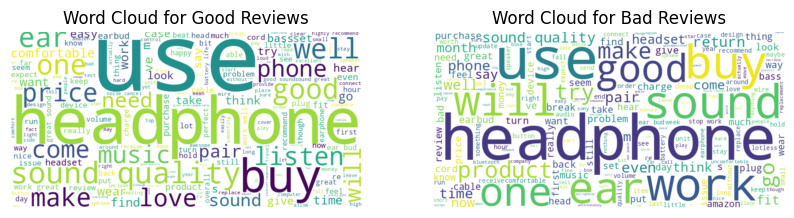

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataframe review_df

# Filter 'Good' and 'Bad' reviews
good_reviews = review_df[review_df['overall'] > 3]['reviewText']  # Filter reviews with ratings > 3
bad_reviews = review_df[review_df['overall'] < 3]['reviewText']  # Filter reviews with ratings < 3

# Concatenate the reviews
good_reviews_text = ' '.join(good_reviews)  # Concatenate all good reviews into a single string
bad_reviews_text = ' '.join(bad_reviews)  # Concatenate all bad reviews into a single string

# Generate word clouds
good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews_text)  # Generate word cloud for good reviews
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews_text)  # Generate word cloud for bad reviews

# Plot word clouds
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')  # Plot word cloud for good reviews
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')  # Plot word cloud for bad reviews
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')

plt.show()


In [ ]:
import pandas as pd

# Assuming you already have a DataFrame named review_df

# Create a new DataFrame with just the 'reviewText' column
new_df = pd.DataFrame(review_df['reviewText'])

# Display the new DataFrame containing only the 'reviewText' column
print(new_df)


                                                reviewText
2441        great headphone its just the cord be too short
2442     really like these headphone want something for...
2443     wire to headphone break off in less than a mon...
2444                                             very good
2445     currently return this product because the soun...
...                                                    ...
6739452  i use these for tail light replacement bulb an...
6739453                   not the bright bulb on the block
6739559  i have only use these for week at the time of ...
6739560  the product work great but when it get down to...
6739561  these earphone be very good i like the design ...

[411201 rows x 1 columns]


In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# Step 2: Preprocess the text data (if needed)
# No preprocessing is needed if your 'overall' DataFrame already contains the text data in a suitable format

# Step 3: Train a Word2Vec model
# Example training data (replace with your actual data)
training_data = overall['rating_column'].apply(lambda x: x.split())  # Assuming 'rating_column' contains the text data
word2vec_model = Word2Vec(sentences=training_data, vector_size=100, window=5, min_count=1, workers=4)  # Adjust parameters as needed

# Step 4: Calculate Word2Vec features for each column
word2vec_features = {}
for column in overall.columns:
    # Assuming each column contains text data (replace 'rating_column' with the actual column name)
    column_data = overall[column].apply(lambda x: x.split())
    column_word2vec = column_data.apply(lambda x: [word2vec_model.wv[word] for word in x if word in word2vec_model.wv])
    word2vec_features[column] = column_word2vec

# Step 5: Create a new DataFrame to store Word2Vec features
word2vec_df = pd.DataFrame(word2vec_features)

# Now 'word2vec_df' contains the Word2Vec features for each column in the 'overall' DataFrame


NameError: name 'overall' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features as needed

# Fit the vectorizer on the review text and transform it into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(review_df['reviewText'])

# Now 'tfidf_vectors' contains the TF-IDF representation of the review text


In [ ]:
print(tfidf_vectors)

  (0, 111014)	0.5242114985529829
  (0, 127605)	0.3822109978808099
  (0, 10980)	0.16450790534531542
  (0, 26261)	0.4272518380799298
  (0, 124211)	0.16157362306761455
  (0, 65354)	0.31457770266427926
  (0, 63819)	0.338827102507458
  (0, 53378)	0.2563509374698204
  (0, 50385)	0.25283452810093626
  (1, 115521)	0.0904278676787844
  (1, 85363)	0.08817327352094674
  (1, 12787)	0.17234608854429637
  (1, 100136)	0.19461051927569534
  (1, 88090)	0.12404265037727
  (1, 13448)	0.22747714788123735
  (1, 16561)	0.2608309898375276
  (1, 125285)	0.08719691160876057
  (1, 19458)	0.23515680824751
  (1, 30998)	0.2540422575556813
  (1, 80202)	0.08527046831671554
  (1, 60285)	0.09487859496158205
  (1, 119193)	0.2395967611770386
  (1, 37163)	0.16260582140474894
  (1, 23191)	0.2260552580510412
  (1, 71220)	0.1480710217252366
  :	:
  (411200, 51737)	0.10029182252461205
  (411200, 30845)	0.07775462737744752
  (411200, 114393)	0.04653360118495943
  (411200, 126634)	0.058258721848008226
  (411200, 4546)	0.056583

In [ ]:
import pandas as pd

# Function to categorize ratings
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply the function to create a new column 'Rating Class'
review_df['Rating Class'] = review_df['overall'].apply(categorize_rating)

# Print the updated DataFrame with the new 'Rating Class' column
review_df


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,Rating Class
2441,5,NaN,True,"02 22, 2015",A38RQFVQ1AKJQQ,4126895493,{'Color:': ' Blue W/Mic'},George Walker,great headphone its just the cord be too short,Five Stars,1424563200,NaN,Good
2442,5,NaN,True,"05 8, 2017",A299MRB9O6GWDE,4126895493,{'Color:': ' Blue Zebra W/Mic'},Carolyn B,really like these headphone want something for...,Officewear,1494201600,NaN,Good
2443,1,NaN,True,"11 5, 2016",A3ACFC6DQQLIQT,4126895493,{'Color:': ' Blue W/Mic'},MK,wire to headphone break off in less than a mon...,For the money they are fine. Just hope they ho...,1478304000,NaN,Bad
2444,3,NaN,True,"09 24, 2016",A36BC0YFDBNB5X,4126895493,{'Color:': ' Green'},bigboy,very good,Three Stars,1474675200,NaN,Average
2445,1,NaN,True,"07 17, 2016",A212PQ0HQPNNWM,4126895493,{'Color:': ' Violet Purple'},Kelly Hales,currently return this product because the soun...,Currently returning this product because the s...,1468713600,NaN,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739452,5,NaN,True,"05 4, 2018",A3E7OV7IR941JI,B01HI7D4VY,NaN,JC,i use these for tail light replacement bulb an...,Excellent LEDS,1525392000,NaN,Good
6739453,3,NaN,True,"03 14, 2018",A26I2RPRWOGD2V,B01HI7D4VY,NaN,Ray,not the bright bulb on the block,Not the brightest bulb on the block.,1520985600,NaN,Average
6739559,4,NaN,True,"09 22, 2018",A3VA3VK4PO1JD,B01HJ8E11E,{'Color:': ' White'},CD,i have only use these for week at the time of ...,They work...,1537574400,NaN,Good
6739560,3,NaN,True,"09 12, 2018",A11TVS6FKXS80H,B01HJ8E11E,{'Color:': ' White'},Jay Salamon,the product work great but when it get down to...,30% charge shuts the device off,1536710400,NaN,Average


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you already have the review_df DataFrame with 'reviewText' and 'Rating Class' columns

# Input features
X = review_df['reviewText']

# Target variable
y = review_df['Rating Class']

# Divide the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)  # Shape of input features in the training set
print("Shape of y_train:", y_train.shape)  # Shape of target variable in the training set
print("Shape of X_test:", X_test.shape)    # Shape of input features in the test set
print("Shape of y_test:", y_test.shape)    # Shape of target variable in the test set


Shape of X_train: (308400,)
Shape of y_train: (308400,)
Shape of X_test: (102801,)
Shape of y_test: (102801,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have review_df DataFrame with 'reviewText' and 'Rating Class' columns

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()  # Initialize TF-IDF vectorizer
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])  # Vectorize the review text
y = review_df['Rating Class']  # Target variable

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression()  # Initialize Logistic Regression model

# Train the model
logistic_regression_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = logistic_regression_model.predict(X_test)  # Predict ratings for test data

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print("Classification Report for Logistic Regression:")
print(classification_rep)  # Print the classification report


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Average       0.45      0.17      0.24     10239
         Bad       0.72      0.66      0.69     14476
        Good       0.88      0.97      0.92     78086

    accuracy                           0.84    102801
   macro avg       0.69      0.60      0.62    102801
weighted avg       0.82      0.84      0.82    102801



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have review_df DataFrame with 'reviewText' and 'Rating Class' columns

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF vectorizer with max_features
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])  # Vectorize the review text
y = review_df['Rating Class']  # Target variable

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Support Vector Machine model
svm_model = SVC()  # Initialize Support Vector Machine model

# Train the model
svm_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = svm_model.predict(X_test)  # Predict ratings for test data

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print("Classification Report for Support Vector Machine:")
print(classification_rep)  # Print the classification report


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have review_df DataFrame with 'reviewText' and 'Rating Class' columns

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF vectorizer with max_features
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])  # Vectorize the review text
y = review_df['Rating Class']  # Target variable

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest classifier model
random_forest_model = RandomForestClassifier()  # Initialize Random Forest classifier model

# Train the model
random_forest_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)  # Predict ratings for test data

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print("Classification Report for Random Forest Classifier:")
print(classification_rep)  # Print the classification report


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming you have review_df DataFrame with 'reviewText' and 'Rating Class' columns

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF vectorizer with max_features
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])  # Vectorize the review text
y = review_df['Rating Class']  # Target variable

# Split the data into train and test sets (75:25 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Decision Tree classifier model
decision_tree_model = DecisionTreeClassifier()  # Initialize Decision Tree classifier model

# Train the model
decision_tree_model.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)  # Predict ratings for test data

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)  # Generate classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_rep)  # Print the classification report


In [ ]:
# a. Top 20 most reviewed brands
top_20_most_reviewed_brands = review_df['brand'].value_counts().head(20)

# b. Top 20 least reviewed brands
top_20_least_reviewed_brands = review_df['brand'].value_counts().tail(20)

# c. Most positively reviewed product
most_positively_reviewed_product = review_df.groupby('product')['overall'].mean().idxmax()

# d. Count of ratings for the product over 5 consecutive years
ratings_over_5_consecutive_years = review_df.groupby(review_df['reviewTime'].dt.year)['overall'].count().head(5)

# e. Word Clouds for 'Good' and 'Bad' ratings
good_reviews_text = ' '.join(review_df[review_df['Rating Class'] == 'Good']['reviewText'])
bad_reviews_text = ' '.join(review_df[review_df['Rating Class'] == 'Bad']['reviewText'])

# f. Distribution of Ratings vs. No. of Reviews
rating_distribution = review_df['overall'].value_counts()

# g. Year with maximum reviews
year_with_max_reviews = review_df['reviewTime'].dt.year.value_counts().idxmax()

# h. Year with the highest number of customers
year_with_highest_customers = review_df.groupby(review_df['reviewTime'].dt.year)['reviewerID'].nunique().idxmax()

# Display the results
print("Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)
print("\nTop 20 least reviewed brands:")
print(top_20_least_reviewed_brands)
print("\nMost positively reviewed product:", most_positively_reviewed_product)
print("\nCount of ratings for the product over 5 consecutive years:")
print(ratings_over_5_consecutive_years)
print("\nDistribution of Ratings vs. No. of Reviews:")
print(rating_distribution)
print("\nYear with maximum reviews:", year_with_max_reviews)
print("\nYear with the highest number of customers:", year_with_highest_customers)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming 'review_df' contains the DataFrame with 'reviewText' and 'Rating Class' columns

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Convert review text to TF-IDF features
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])
y = review_df['Rating Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, X_train and X_test contain TF-IDF features representing the review text
# y_train and y_test contain the corresponding target labels


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Rating Class' column
label_encoder = LabelEncoder()
review_df['Rating Class Encoded'] = label_encoder.fit_transform(review_df['Rating Class'])

# Separate features (X) and target (y)
X = tfidf_vectorizer.fit_transform(review_df['reviewText'])
y = review_df['Rating Class Encoded']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, X_train and X_test contain TF-IDF features representing the review text
# y_train and y_test contain the corresponding encoded target labels


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'review_df' contains the DataFrame with 'reviewText' and 'Rating Class' columns

# Separate features (X) and target (y)
X = review_df['reviewText']
y = review_df['Rating Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now, X_train and y_train contain the training data (features and target)
# X_test and y_test contain the testing data (features and target)


In [ ]:
from sklearn.metrics import classification_report

# Define a function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Good', 'Average', 'Bad'])

    return report

# List of models to compare
models = [model1, model2, model3, model4, model5]  # Replace with your models

# List to store evaluation results
evaluation_results = []

# Iterate over each model
for model in models:
    # Evaluate the model
    evaluation_result = evaluate_model(model, X_test, y_test)

    # Append evaluation result to the list
    evaluation_results.append(evaluation_result)

# Print evaluation results for each model
for i, result in enumerate(evaluation_results):
    print(f"Model {i+1}:\n{result}\n")


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold

# Example user-item rating matrix (replace with your data)
ratings_matrix = np.array([[5, 4, 0, 3],
                           [0, 5, 4, 0],
                           [4, 0, 0, 5],
                           [0, 4, 0, 3]])

# a) Create user-item rating matrix
# ratings_matrix = ...

# b) Normalize the ratings (min-max scaling)
ratings_min = np.min(ratings_matrix, axis=1, keepdims=True)
ratings_max = np.max(ratings_matrix, axis=1, keepdims=True)
normalized_ratings = (ratings_matrix - ratings_min) / (ratings_max - ratings_min)

# Define function to calculate MAE for user-user or item-item recommender system
def calculate_mae(similarity_matrix, ratings_matrix, N):
    kf = KFold(n_splits=5)
    mae_values = []

    for train_index, val_index in kf.split(ratings_matrix):
        train_ratings = ratings_matrix[train_index]
        val_ratings = ratings_matrix[val_index]

        predicted_ratings = np.zeros_like(val_ratings)
        for i in range(val_ratings.shape[0]):
            for j in range(val_ratings.shape[1]):
                if val_ratings[i, j] == 0:
                    # Find top N similar users/items
                    top_N_indices = np.argsort(similarity_matrix[i])[::-1][:N]
                    # Predict rating using weighted average of top N similar users/items
                    weights = similarity_matrix[i, top_N_indices]
                    weighted_ratings = train_ratings[:, j][top_N_indices]
                    predicted_ratings[i, j] = np.sum(weights * weighted_ratings) / np.sum(weights)

        mae = mean_absolute_error(val_ratings[val_ratings != 0], predicted_ratings[val_ratings != 0])
        mae_values.append(mae)

    return np.mean(mae_values)

# c) User-user recommender system
def user_user_recommender(ratings_matrix, N_values):
    similarity_matrix = cosine_similarity(ratings_matrix)
    mae_values_user_user = []

    for N in N_values:
        mae = calculate_mae(similarity_matrix, ratings_matrix, N)
        mae_values_user_user.append(mae)

    return mae_values_user_user

# d) Item-item recommender system
def item_item_recommender(ratings_matrix, N_values):
    similarity_matrix = cosine_similarity(ratings_matrix.T)
    mae_values_item_item = []

    for N in N_values:
        mae = calculate_mae(similarity_matrix, ratings_matrix.T, N)
        mae_values_item_item.append(mae)

    return mae_values_item_item

# e) Plot MAE against N for user-user and item-item recommender systems
import matplotlib.pyplot as plt

N_values = [10, 20, 30, 40, 50]

mae_values_user_user = user_user_recommender(normalized_ratings, N_values)
mae_values_item_item = item_item_recommender(normalized_ratings, N_values)

plt.figure(figsize=(10, 6))
plt.plot(N_values, mae_values_user_user, marker='o', label='User-User Recommender')
plt.plot(N_values, mae_values_item_item, marker='o', label='Item-Item Recommender')
plt.title('MAE vs. N for User-User and Item-Item Recommender Systems')
plt.xlabel('N (Number of Similar Users/Items)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(N_values)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming 'ratings_df' contains the user-item ratings DataFrame
# 'ratings_df' should have columns: 'user_id', 'product_id', and 'rating'

# Step 1: Sum the ratings for each product across all users
product_sum_ratings = ratings_df.groupby('product_id')['rating'].sum()

# Step 2: Sort the products based on their sum ratings in descending order
top_10_products = product_sum_ratings.sort_values(ascending=False).head(10)

# Step 3: Display the top 10 products by user sum ratings
print("Top 10 Products by User Sum Ratings:")
for rank, (product_id, sum_rating) in enumerate(top_10_products.items(), start=1):
    print(f"{rank}. Product ID: {product_id}, Sum of Ratings: {sum_rating}")
